# Apartments costs regression models

## Packages

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

## Problem statement

##  Data exploration

### Loading

In [4]:
# Load a dataset
raw_data = pd.read_csv("apartments_pl_2023q3.csv")

### Exploraion

In [5]:
# Check the dataset size
raw_data.shape

(19478, 27)

In [6]:
# Get all columns names
raw_data.columns


Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'buildingMaterial', 'condition',
       'hasParkingSpace', 'hasBalcony', 'hasElevator', 'hasSecurity',
       'hasStorageRoom', 'price'],
      dtype='object')

In [7]:
# Get sample data from the dataset
raw_data.sample(5)

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
11384,lodz,apartmentBuilding,31.0,1.0,NaN,4.0,2014.0,51.760900,19.404100,4.17,...,1.015,condominium,brick,NaN,no,yes,yes,yes,yes,320000
17218,warszawa,NaN,52.6,2.0,1.0,4.0,NaN,52.214220,20.969740,3.02,...,0.035,condominium,NaN,NaN,no,no,NaN,no,no,750000
18920,bydgoszcz,NaN,55.0,2.0,1.0,1.0,1908.0,53.128664,17.990016,1.03,...,0.369,condominium,NaN,NaN,no,no,no,no,no,290000
1358,gdynia,NaN,71.7,3.0,3.0,3.0,2000.0,54.466530,18.485690,6.98,...,0.136,condominium,NaN,NaN,no,yes,no,no,no,650000
8523,wroclaw,blockOfFlats,49.8,2.0,1.0,3.0,2008.0,51.061300,17.079800,6.51,...,0.265,condominium,brick,NaN,yes,no,no,yes,yes,455000


In [8]:
# Check % of NaN in each column
raw_data.isna().sum() /  100 / len(raw_data)

city                    0.000000
type                    0.002097
squareMeters            0.000000
rooms                   0.000000
floor                   0.001828
floorCount              0.000137
buildYear               0.001711
latitude                0.000000
longitude               0.000000
centreDistance          0.000000
poiCount                0.000000
schoolDistance          0.000007
clinicDistance          0.000045
postOfficeDistance      0.000013
kindergartenDistance    0.000007
restaurantDistance      0.000030
collegeDistance         0.000319
pharmacyDistance        0.000014
ownership               0.000000
buildingMaterial        0.003897
condition               0.007603
hasParkingSpace         0.000000
hasBalcony              0.000000
hasElevator             0.000476
hasSecurity             0.000000
hasStorageRoom          0.000000
price                   0.000000
dtype: float64

## Data preparation

### Data cleaning

In [60]:
# Get only columns we are going to use to build a model
real_estate_df = raw_data[['price','squareMeters', 'centreDistance', 'schoolDistance']]

In [61]:
# Rename columns
real_estate_df = real_estate_df.rename(columns={'price':'X','squareMeters':'Y_1', 'centreDistance':'Y_2', 'schoolDistance':'Y_3'})

In [62]:
"""
Since a linear regression won't work with null values, we may need to get rid of nulls before bulding a model.
Replacing NaNs with 0 won't work in this case because it will mess up the calculations. So I decided to drop rows with NaNs.
We don't have a variable with a lot of missing values, but if there were such variables, I'd consider not choosing it for my model.
"""

"\nSince a linear regression won't work with null values, we may need to get rid of nulls before bulding a model.\nReplacing NaNs with 0 won't work in this case because it will mess up the calculations. So I decided to drop rows with NaNs.\nWe don't have a variable with a lot of missing values, but if there were such variables, I'd consider not choosing it for my model.\n"

In [63]:
# Get rid of rows with NaNs
real_estate_df = real_estate_df.dropna()

In [64]:
# Check % of NaN after dropping
real_estate_df.isna().sum() /  (100 / len(real_estate_df))

X      0.0
Y_1    0.0
Y_2    0.0
Y_3    0.0
dtype: float64

In [65]:
real_estate_df.sample(5)

,X,Y_1,Y_2,Y_3
8517,890000,53.80,7.82,1.698
14795,899000,54.60,8.05,0.502
502,369000,70.00,1.45,0.041
14582,670000,37.00,8.80,0.108
2592,899000,49.99,2.50,0.711


### Sampling

In [66]:
# Use random sampling, the sample is large enough to be close to normal distribution
real_estate_sampled = real_estate_df.sample(n=500)

### Data vizualization

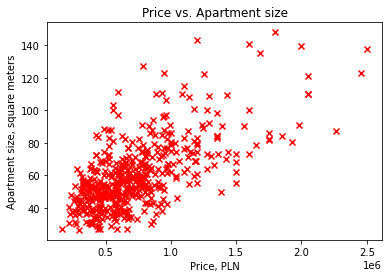

In [67]:
# Create a scatter plot of the data. 
plt.scatter(real_estate_sampled['X'], real_estate_sampled['Y_1'], marker='x', c='r') 

# Set the title
plt.title("Price vs. Apartment size")
# Set the y-axis label
plt.ylabel('Apartment size, square meters')
# Set the x-axis label
plt.xlabel('Price, PLN')
plt.show()

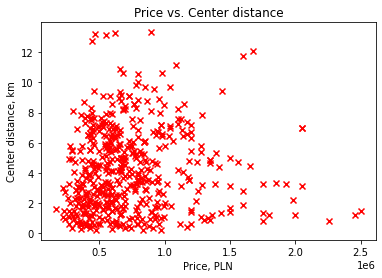

In [68]:
# Create a scatter plot of the data.
plt.scatter(real_estate_sampled['X'], real_estate_sampled['Y_2'], marker='x', c='r')

# Set the title
plt.title("Price vs. Center distance")
# Set the y-axis label
plt.ylabel('Center distance, km')
# Set the x-axis label
plt.xlabel('Price, PLN')
plt.show()

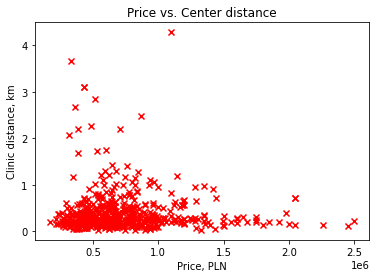

In [69]:
# Create a scatter plot of the data.
plt.scatter(real_estate_sampled['X'], real_estate_sampled['Y_3'], marker='x', c='r')

# Set the title
plt.title("Price vs. Center distance")
# Set the y-axis label
plt.ylabel('Clinic distance, km')
# Set the x-axis label
plt.xlabel('Price, PLN')
plt.show()

### Feature normalization

In [70]:
# Create a function that normalizes data to improve accurasy of the model
def normalize(feature):
    return (feature-np.mean(feature))/(max(feature)-min(feature))

In [71]:
# Normalize all features
for i in real_estate_sampled.columns:
    real_estate_sampled[i] = normalize(real_estate_sampled[i])

In [72]:
real_estate_sampled.head(3)

,X,Y_1,Y_2,Y_3
16332,-0.060246,-0.195303,-0.271649,-0.039208
16895,-0.019474,-0.170652,-0.039002,-0.057574
12914,0.268080,0.198288,0.050243,-0.016604


### Train / test split

In [73]:
train_set = real_estate_sampled.sample(frac=0.8,random_state=200)
test_set = real_estate_sampled.drop(train_set.index)

## Multiple logistic regression model

### Gradient descent

In [74]:
# Get number of training examples
n = train_set.shape[0]
print(n)

400


In [75]:
# Set parameters for slope and intercept (zero initialization)
w_curr = 0
b_curr = 0

# Initialize learning rate
alpha = 0.001

In [27]:
# Initialize the function
def gradient_descent(x, y):
    # Set parameters for slope and intercept (zero initialization)
    w_curr = 0
    b_curr = 0
    # Initialize learning rate
    alpha = 0.001
    for i in range(n):
        # prediction for X using parameters w,b (a linear regression function)
        #f_wb = w_curr * x + b_curr
        # cost function
        cost = 1/(2*n)* (((w_curr * x + b_curr) - y)**2)
        # gradient descent
        w_temp = w_curr - alpha * diff(cost, w_curr)
        b_temp = b_curr - alpha * diff(cost, b_curr)
        w_curr = w_temp
        b_curr = b_temp
        print("w {}, b {}, cost {}, iteration {}".format(w_curr, b_curr, cost, i))



In [28]:
gradient_descent(train_set['X'], train_set['Y_1'])

NameError: name 'diff' is not defined

In [ ]:
# https://towardsdatascience.com/challenge-can-i-do-linear-regression-without-sklearn-3151d8fc8aa
# https://purnasaigudikandula.medium.com/linear-regression-in-python-with-cost-function-and-gradient-descent-bde9a8d2626#:~:text=a%20cost%20function%20is%20a,relationship%20between%20X%20and%20y.&text=here%20are%203%20error%20functions,RMSE(Root%20Mean%20Squared%20Error)
# https://www.startertutorials.com/blog/gradient-descent-and-cost-function-in-python.html

## Same model but with Scikit-learn

In [76]:
x = np.array(train_set['X']).reshape((-1, 1))
y = np.array(train_set['Y_1'])

In [90]:
regression_model = LinearRegression().fit(x,y) 
y_pred = regression_model.predict(x)

In [91]:
r_sq = regression_model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.39333130315518716


In [92]:
# Print the Intercept:
print('intercept:', regression_model.intercept_)

intercept: 0.0037031229639341084


In [93]:
# Print the Slope:
print('slope:', regression_model.coef_)

slope: [0.71454445]


In [94]:
# Regression function
f_wb = regression_model.coef_ * x - regression_model.intercept_

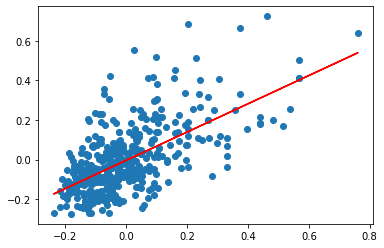

In [95]:
# Plot the estimated linear regression line with matplotlib:
plt.scatter(x, y)
plt.plot(x, f_wb, 'r');
plt.show()

## Models validation

In [ ]:
# Lets use Root Mean Squared Error (RMSE) to validate both models
# https://statisticsbyjim.com/regression/root-mean-square-error-rmse/

In [96]:
mse = mean_squared_error(y_true=y, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y, y_pred=y_pred, squared=False)


print('MSE: {:.6f}'.format(mse))
print('RMSE: {:.6f}'.format(rmse))


MSE: 0.018295
RMSE: 0.135259


In [97]:
# https://datagy.io/mape-python/
print(mean_absolute_percentage_error(y, y_pred))

2.399852568151766
